<a href="https://colab.research.google.com/github/Kushagratandon12/Machine-Learning-Projects/blob/master/Song_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 


In [ ]:
data = open('/content/Hindi Songs.txt').read()
print(len(data))
corpus = data.lower().split('\n')

9977


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)
print(tokenizer.word_index)

683
{'hai': 1, 'na': 2, 'bhi': 3, 'main': 4, 'se': 5, 'mein': 6, 'ki': 7, 'tu': 8, 'tere': 9, 'jo': 10, 'ke': 11, 'teri': 12, 'ho': 13, 'tum': 14, 'hi': 15, 'kyun': 16, 'yeh': 17, 'meri': 18, 'hain': 19, 'toh': 20, 'jaane': 21, 'dil': 22, 'ko': 23, 'tujhe': 24, 'tera': 25, 'ab': 26, 'mera': 27, 'hua': 28, 'mujhe': 29, 'kabhi': 30, 'hum': 31, 'hoon': 32, 'kaise': 33, 'mere': 34, 'ye': 35, 'zara': 36, 'khamoshiyan': 37, 'nahi': 38, 'mujhko': 39, 'gaya': 40, 'kya': 41, 'jaaye': 42, 'baatein': 43, 'jaan': 44, 'lage': 45, 'bin': 46, 'baat': 47, 'tujhko': 48, 'phir': 49, 'woh': 50, 'koi': 51, 'aaj': 52, 'kahin': 53, 'aaye': 54, 'thi': 55, 'to': 56, 'kitna': 57, 'ne': 58, 'khud': 59, 'le': 60, 'jaaun': 61, 'door': 62, 'bas': 63, 'sa': 64, 'loon': 65, 'ik': 66, 'kal': 67, 'kahaan': 68, 'ishq': 69, 'har': 70, 'pe': 71, 'keh': 72, 'rahe': 73, 'lenge': 74, 'inko': 75, 'ka': 76, 're': 77, 'hawayein': 78, 'karo': 79, 'faasle': 80, 'aa': 81, 'khwaab': 82, 'de': 83, 'jee': 84, 'bina': 85, 'pal': 86, 

In [ ]:
#creating a list on input sequence 
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [ ]:
print(tokenizer.texts_to_sequences([line])[0])

[]


In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(xs[20])
print(ys[20])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 158 159   4]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128,go_backwards=True,return_sequences=True)))
model.add(Bidirectional(LSTM(256,go_backwards=True)))
#model.add(Dropout(0.015))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 100)           68300     
_________________________________________________________________
bidirectional (Bidirectional (None, 18, 256)           234496    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1050624   
_________________________________________________________________
dense (Dense)                (None, 683)               350379    
Total params: 1,703,799
Trainable params: 1,703,799
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
53/53 [==============================] - 18s 227ms/step - loss: 6.4120 - accuracy: 0.0193
Epoch 2/100
53/53 [==============================] - 12s 223ms/step - loss: 5.8064 - accuracy: 0.0508
Epoch 3/100
53/53 [==============================] - 12s 225ms/step - loss: 5.3098 - accuracy: 0.0692
Epoch 4/100
53/53 [==============================] - 12s 223ms/step - loss: 4.7343 - accuracy: 0.0870
Epoch 5/100
53/53 [==============================] - 12s 223ms/step - loss: 3.8499 - accuracy: 0.1849
Epoch 6/100
53/53 [==============================] - 12s 224ms/step - loss: 3.0937 - accuracy: 0.2957
Epoch 7/100
53/53 [==============================] - 12s 223ms/step - loss: 2.2775 - accuracy: 0.4557
Epoch 8/100
53/53 [==============================] - 12s 221ms/step - loss: 1.5650 - accuracy: 0.5896
Epoch 9/100
53/53 [==============================] - 12s 220ms/step - loss: 0.9603 - accuracy: 0.7624
Epoch 10/100
53/53 [==============================] - 12s 223ms/step - loss: 0.710

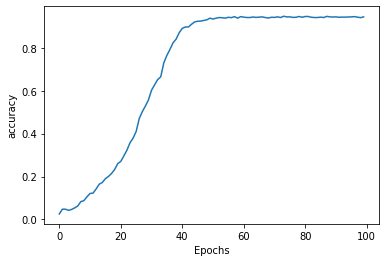

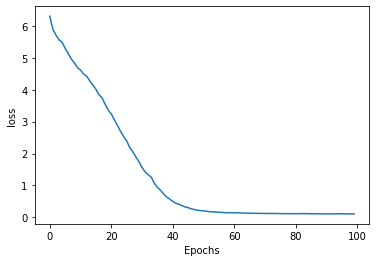

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')

In [ ]:
seed_text = "ye haseen waadiyan ye khula aasmaan "
seed_text = seed_text.lower()
next_words =30

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


agar tum na hoti  hai tu hi safar hai inhe toh rehna yakeen bhar tham jaa mujhe tere liye kyun kyun bhi nahi na jaane kyun na jaane kyun meelon ke hai faasle tum
